In [12]:
!git clone https://github.com/niazwazir/subpixellayer.git

Cloning into 'subpixellayer'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [13]:
!ls

__pycache__  subpixellayer  subpixel.py


In [14]:
cd subpixellayer

/content/subpixellayer/subpixellayer


In [0]:
from keras.layers import Input, Conv2D, Activation
from subpixel import SubpixelConv2D
from keras.models import Model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [20]:
img_shape = (32,32,1)
input_img = Input(shape=(img_shape))
C1 = Conv2D(64, (9,9), name='FIRST_CONVOLUTION_LAYER')((input_img)) 
A1 = Activation('relu', name='act1')(C1)
C2 = Conv2D(64, (9,9), name='SECOND_CONVOLUTION_LAYER')((A1)) 
A2 = Activation('relu', name='act2')(C2)
SubPixel = SubpixelConv2D(img_shape, scale=4)(A2)#UPSCALING FACTOR VALUE IS 2,4,8
A3 = Activation('relu', name='act3')(SubPixel)

model = Model(inputs=input_img, outputs=A3)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
FIRST_CONVOLUTION_LAYER (Con (None, 24, 24, 64)        5248      
_________________________________________________________________
act1 (Activation)            (None, 24, 24, 64)        0         
_________________________________________________________________
SECOND_CONVOLUTION_LAYER (Co (None, 16, 16, 64)        331840    
_________________________________________________________________
act2 (Activation)            (None, 16, 16, 64)        0         
_________________________________________________________________
subpixel (Lambda)            (None, 64, 64, 4)         0         
_________________________________________________________________
act3 (Activation)            (None, 64, 64, 4)         0         
Total para

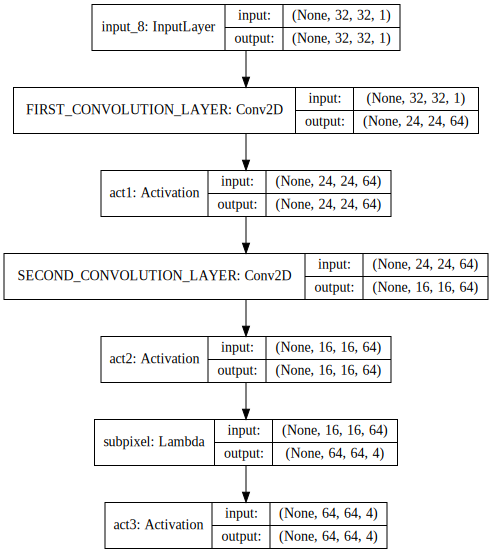

In [21]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))